In [1]:
# pip install opencv-python
#pip install mediapipe

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
from math import cos, sin
import os

Text(0.5, 1.0, 'original color image')

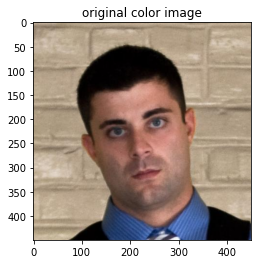

In [3]:
img = cv2.imread("AFLW2000/image00013.jpg")
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("original color image")


In [4]:
mat = sio.loadmat('AFLW2000/image00013.mat')

In [5]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 29 22:50:26 2016',
 '__version__': '1.0',
 '__globals__': [],
 'pt2d': array([[136.67839196, 164.5678392 , 189.44221106, 229.3919598 ,
         260.29648241, 281.40201005, 158.53768844, 176.6281407 ,
         197.55994818, 242.13048764, 257.70853045, 277.18110695,
         135.24777697, 203.61807082, 217.89799707, 249.05408267,
         322.18429059, 210.54773869, 235.42211055, 257.28140704,
         244.72681277],
        [216.57788945, 207.53266332, 207.53266332, 191.70351759,
         182.65829146, 182.65829146, 231.65326633, 228.63819095,
         230.03871776, 217.05700009, 208.40250631, 209.26797869,
         293.64905153, 281.53280624, 263.79112849, 268.55108857,
         252.97304577, 318.33668342, 312.30653266, 308.53768844,
         377.59738819]]),
 'Illum_Para': array([[ 0.92531824,  0.85142124,  0.84738654,  0.55454063,  0.63420337,
          0.66929287,  0.07650548,  1.24921274,  0.02066589, 20. 

In [6]:
#https://blog.karatos.in/a?ID=01000-b97ce8ef-447b-4ea8-8384-9b8865bc1d25
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pt2d', 'Illum_Para', 'Color_Para', 'Tex_Para', 'Shape_Para', 'Exp_Para', 'Pose_Para', 'roi', 'pt3d_68'])

In [7]:
mat['Pose_Para']

array([[-2.6811734e-02,  1.1965371e-02, -2.2066212e-01,  2.2562460e+02,
         1.9987886e+02, -1.0952541e+02,  1.3571952e-03]], dtype=float32)

In [8]:
#https://github.com/vitoralbiero/img2pose/issues/2

# Yes, the order is pitch, yaw, roll, horizontal translation, vertical translation, and scale.
# By your pose example it looks like you are doing it right, 
#but just double check that you are giving the pose mean and std deviation when creating the model, or adding it afterwards.

In [9]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size=50):
    yaw = -yaw

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [10]:
len(mat['Pose_Para'][0])

7

In [11]:
pitch, yaw, roll, h, v,t, scale = mat['Pose_Para'][0]
res_img = draw_axis(np.asarray(img), yaw, pitch, roll)

Text(0.5, 1.0, 'd')

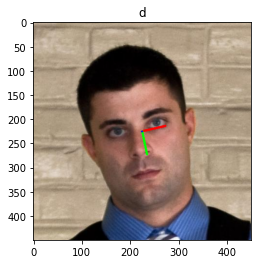

In [12]:
plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))
plt.title("d")

In [13]:
# res = img2pose_model.predict([transform(img)])[0]
# all_bboxes = res["boxes"].cpu().numpy().astype('float')
# poses = []
# bboxes = []
# for i in range(len(all_bboxes)):
#         if res["scores"][i] > threshold:
#             bbox = all_bboxes[i]
#             pose_pred = res["dofs"].cpu().numpy()[i].astype('float')
#             pose_pred = pose_pred.squeeze()

#             poses.append(pose_pred)
#             bboxes.append(bbox)

In [14]:
images_list=[]
mat_list=[]
for filename in os.listdir("AFLW2000"):
    if   ".jpg" in filename :
        images_list.append(filename)
    elif ".mat" in filename:
        mat_list.append(filename)

In [15]:
len(images_list)

2000

In [16]:
len(mat_list)

2000

Text(0.5, 1.0, 'original color image')

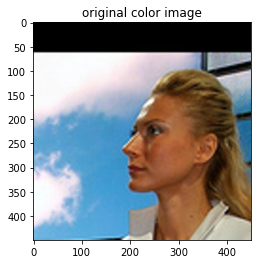

In [17]:
name=images_list[1]
img = cv2.imread("AFLW2000/"+name)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("original color image")

In [18]:
img_array=[]
for name in images_list:
    img = cv2.imread("AFLW2000/"+name)
    img_array.append(img)


In [19]:
len(img_array)

2000

Text(0.5, 1.0, 'original color image')

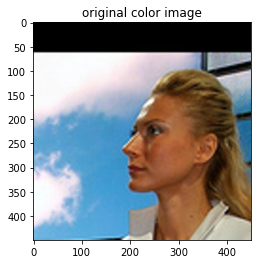

In [20]:
plt.imshow(cv2.cvtColor(img_array[1], cv2.COLOR_BGR2RGB))
plt.title("original color image")

In [21]:
# f = plt.figure(figsize=(15, 15))
# f.add_subplot(1, 2, 1)
# plt.imshow(gray, cmap = 'gray')
# plt.title("Over the Clouds - gray")

# f.add_subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.title("Over the Clounds - original color image")

In [22]:
#video
# https://www.youtube.com/watch?v=_7kENQznPAU&list=PLyhJeMedQd9QrXtCspclJ9ace2urp05o0&index=4

cap=cv2.VideoCapture(0)
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out =cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))
                         
print(cap.isOpened())
while(cap.isOpened()):
    ret,frame= cap.read()
    if ret== True:
#         print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#         print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        out.write(frame)
#         gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
                          break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()
                          

True


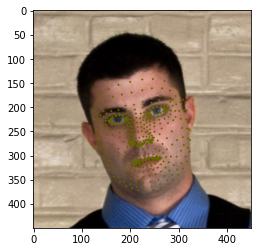

In [23]:
#mediapipe
# https://www.youtube.com/watch?v=heT-ovrCEK4


image = cv2.imread("AFLW2000/image00013.jpg")


#Face Mesh
mp_face_mesh=mp.solutions.face_mesh.FaceMesh()
rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
           
#Facial landmarks
result=mp_face_mesh.process(rgb_image)
height,width,_=image.shape     
for facial_landmarks in result.multi_face_landmarks:
    for i in range(0,468):
        pt1=facial_landmarks.landmark[i]
        #print(pt1)
        x=int(pt1.x*width)
        y=int(pt1.y*height)
        cv2.circle(rgb_image,(x,y),2,(100,100,0),-1)
           
plt.imshow(rgb_image)

In [24]:
#video with media pipe

mp_face_mesh=mp.solutions.face_mesh.FaceMesh()

cap=cv2.VideoCapture(0)
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out =cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))
                         
print(cap.isOpened())
while(cap.isOpened()):
    ret,frame= cap.read()
    if ret== True:
        #rgb_image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        height,width,_=frame.shape
        #Facial landmarks
        result=mp_face_mesh.process(frame)
    
        if result.multi_face_landmarks != None: 
            for facial_landmarks in result.multi_face_landmarks:
                for i in range(0,468):
                    pt1=facial_landmarks.landmark[i]
                    #print(pt1)
                    x=int(pt1.x * width)
                    y=int(pt1.y * height)
                    cv2.circle(frame,(x,y),2,(100,100,0),-1)
            #out.write(rgb_image)
            cv2.imshow('frame',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                              break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()




True


In [25]:
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

In [33]:
image_input = cv2.imread("AFLW2000/image00013.jpg")
mp_face = mp.solutions.face_detection.FaceDetection(
    model_selection=1,  # model selection
    min_detection_confidence=0.5  # confidence threshold
)
results = mp_face.process(image_input)

image_rows, image_cols, _ = image_input.shape
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

detection = results.detections[0]
print(detection)

eye_left=mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.LEFT_EYE)

NoseTip=mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP)
print(eye_left)
print(NoseTip)



nose = _normalized_to_pixel_coordinates(NoseTip.x,NoseTip.y, image_cols,image_rows)
eye_l = _normalized_to_pixel_coordinates(eye_left.x,eye_left.y, image_cols,image_rows)

cv2.putText(image_input, 'R', nose
            ,cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2.putText(image_input, 'L', eye_l,cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


cv2.imwrite('this_output.png', image_input)

label_id: 0
score: 0.7737122178077698
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.20021086931228638
    ymin: 0.29182928800582886
    width: 0.5612422227859497
    height: 0.5612453818321228
  }
  relative_keypoints {
    x: 0.3744291365146637
    y: 0.4948059618473053
  }
  relative_keypoints {
    x: 0.5909205675125122
    y: 0.48011860251426697
  }
  relative_keypoints {
    x: 0.5021573901176453
    y: 0.6388590335845947
  }
  relative_keypoints {
    x: 0.5078630447387695
    y: 0.7336236238479614
  }
  relative_keypoints {
    x: 0.2597503364086151
    y: 0.533835768699646
  }
  relative_keypoints {
    x: 0.6944003105163574
    y: 0.49875760078430176
  }
}

x: 0.5909205675125122
y: 0.48011860251426697

x: 0.5021573901176453
y: 0.6388590335845947



True